In [1]:
from similarityfunctions import *
from hypfunctions import *
import networkx as nx
from itertools import permutations, combinations
import pandas as pd
import matplotlib. pyplot as plt 

C:\Users\hanaa\Anaconda3\lib\site-packages\networkx\drawing\layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


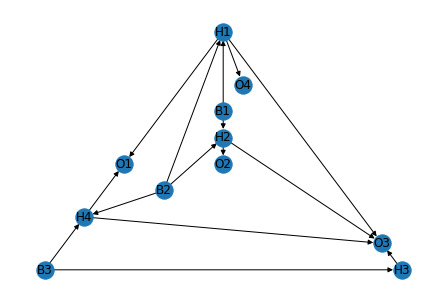

In [2]:
# make the graph
dg = nx.DiGraph()
dg.add_nodes_from(['B1', 'B2', 'B3', 'H1', 'H2', 'H3', 'H4', 'O1', 'O2', 'O3', 'O4'])
dg.add_weighted_edges_from([('B1', 'H1', .00202468), ('B1', 'H2', .08057), ('B2', 'H1', .0186659),
                            ('B2', 'H2', .112701), ('B2', 'H4', .0213237), ('B3', 'H3', .000539787),
                            ('B3', 'H4', .010469), ('H1', 'O1', .0984895), ('H1', 'O3', .153152),
                            ('H1', 'O4', .0674959), ('H2', 'O2', .0281283), ('H2', 'O3', .154807),
                            ('H3', 'O3', .081519), ('H4', 'O1', .0994138), ('H4', 'O3', .136902)])

nx.draw_planar(dg, with_labels = True)

In [3]:
bnodes = [node for node in list(dg.nodes()) if not list(dg.predecessors(node)) and list(dg.successors(node))] #root nodes
observations = [node for node in list(dg.nodes()) if not list(dg.successors(node)) and list(dg.predecessors(node))] #terminal nodes
hypotheses = findHypotheses(dg, observations, bnodes)
print(bnodes) 
print(observations) 
print(hypotheses)

['B1', 'B2', 'B3']
['O1', 'O2', 'O3', 'O4']
[['H1', 'H2'], ['H1', 'H2', 'H3'], ['H1', 'H2', 'H4'], ['H1', 'H2', 'H3', 'H4']]


In [4]:
# learn the CPTable


########## BACKGROUND
# B1
cpt_B1 = CPT(0)
cpt_B1.add_entry_self((1-.503606, 503606))
dg.nodes['B1']['CPT'] = cpt_B1

# B2
cpt_B2 = CPT(0)
cpt_B2.add_entry_self((1-.845371, .845371))
dg.nodes['B2']['CPT'] = cpt_B2

# B3
cpt_B3 = CPT(0)
cpt_B3.add_entry_self((1-.514031, .514031))
dg.nodes['B3']['CPT'] = cpt_B3


########### HYPOTHESES
# H1
cpt_H1 = CPT(2)
cpt_H1.add_entry([1, 1], (1-.729227, .729227))
cpt_H1.add_entry([1, 0], (1-.551053, .551053))
cpt_H1.add_entry([0, 1], (1-.694833, .694833))
cpt_H1.add_entry([0, 0], (1-.449833, .449833))
dg.nodes['H1']['CPT'] = cpt_H1

# H2
cpt_H2 = CPT(2)
cpt_H2.add_entry([1, 1], (1-.532645, .532645))
cpt_H2.add_entry([1, 0], (1-.584505, .584505))
cpt_H2.add_entry([0, 1], (1-.771033, .771033))
cpt_H2.add_entry([0, 0], (1-.0485063, .0485063))
dg.nodes['H2']['CPT'] = cpt_H2

# H3
cpt_H3 = CPT(1)
cpt_H3.add_entry([1], (1-.425611, .425611))
cpt_H3.add_entry([0], (1-.398675, .398675))
dg.nodes['H3']['CPT'] = cpt_H3

# H4
cpt_H4 = CPT(2)
cpt_H4.add_entry([1, 1], (1-.500128, .500128))
cpt_H4.add_entry([1, 0], (1-.507406, .507406))
cpt_H4.add_entry([0, 1], (1-.539644, .539644))
cpt_H4.add_entry([0, 0], (1-.82106, .82106))
dg.nodes['H4']['CPT'] = cpt_H4


############# OBSERVED EFFECTS
cpt_O1 = CPT(2)
cpt_O1.add_entry([1, 1], (1-.702458, .702458))
cpt_O1.add_entry([1, 0], (1-.521399, .521399))
cpt_O1.add_entry([0, 1], (1-.30641, .30641))
cpt_O1.add_entry([0, 0], (1-.876099, .876099))
dg.nodes['O1']['CPT'] = cpt_O1

cpt_O2 = CPT(1)
cpt_O2.add_entry([1], (1-.131251, .131251))
cpt_O2.add_entry([0], (1-.292697, .292697))
dg.nodes['O2']['CPT'] = cpt_O2


cpt_O3 = CPT(4)
cpt_O3.add_entry([1, 1, 1, 1], (1-.255582, .255582))
cpt_O3.add_entry([1, 1, 1, 0], (1-.443595, .443595))
cpt_O3.add_entry([1, 1, 0, 1], (1-.0692005, .0692005))
cpt_O3.add_entry([1, 1, 0, 0], (1-.760635, .760635))
cpt_O3.add_entry([1, 0, 1, 1], (1-.562661, .562661))
cpt_O3.add_entry([1, 0, 1, 0], (1-.398679, .398679))
cpt_O3.add_entry([1, 0, 0, 1], (1-.714025, .714025))
cpt_O3.add_entry([1, 0, 0, 0], (1-.403932, .403932))
cpt_O3.add_entry([0, 1, 1, 1], (1-.315988, .315988))
cpt_O3.add_entry([0, 1, 1, 0], (1-.76531, .76531))
cpt_O3.add_entry([0, 1, 0, 1], (1-.879789, .879789))
cpt_O3.add_entry([0, 1, 0, 0], (1-.894966, .894966))
cpt_O3.add_entry([0, 0, 1, 1], (1-.656085, .656085))
cpt_O3.add_entry([0, 0, 1, 0], (1-.646029, .646029))
cpt_O3.add_entry([0, 0, 0, 1], (1-.164357, .164357))
cpt_O3.add_entry([0, 0, 0, 0], (1-.50549, .50549))
dg.nodes['O3']['CPT'] = cpt_O3


cpt_O4 = CPT(1)
cpt_O4.add_entry([1], (1-.694085, .694085))
cpt_O4.add_entry([0], (1-.371292, .371292))
dg.nodes['O4']['CPT'] = cpt_O4

# Generate new edges to create a common cause

In [5]:
scenarios = get_possible_truths(dg, bnodes, observations)
truths = [list(k) for k in list(scenarios.keys())]
falses = list(scenarios.values())

In [6]:
fbe1 = get_all_FBE(dg, observations, bnodes)
fbe2 = get_all_FBE(dg, observations, bnodes, flipped=True)

(['H1', 'H2'], 0.23670102833407866)
(['H1', 'H2', 'H3'], 0.09003093870682692)
(['H1', 'H2', 'H4'], 0.2058801266289736)
(['H1', 'H2', 'H3', 'H4'], 0.07133884008033921)
(['H1', 'H2'], 0.49496784881534284)
(['H1', 'H2', 'H3'], 0.22298875927602688)
(['H1', 'H2', 'H4'], 0.2969470221215539)
(['H1', 'H2', 'H3', 'H4'], 0.10289412810416095)
(['H1', 'H2'], 0.015665935608940734)
(['H1', 'H2', 'H3'], 0.007365206483105696)
(['H1', 'H2', 'H4'], 0.009771666668823932)
(['H1', 'H2', 'H3', 'H4'], 0.0036360280579445965)
(['H1', 'H2'], 0.03743314215225636)
(['H1', 'H2', 'H3'], 0.013599646671452503)
(['H1', 'H2', 'H4'], 0.035014334690710545)
(['H1', 'H2', 'H3', 'H4'], 0.012132701023259158)
(['H1', 'H2'], 0.005032320710541721)
(['H1', 'H2', 'H3'], 0.0019140793795134011)
(['H1', 'H2', 'H4'], 0.004377060938077773)
(['H1', 'H2', 'H3', 'H4'], 0.0015166808734587503)
(['H1', 'H2'], 0.006921545177911712)
(['H1', 'H2', 'H3'], 0.0031007123169569614)
(['H1', 'H2', 'H4'], 0.0027150583629145237)
(['H1', 'H2', 'H3', 'H4

In [7]:
# best explanations before generated edge
from collections import Counter

fbe_result =[tuple(v[0]) for v in list(fbe1.values())]
fbe_count = dict(Counter(fbe_result))
    
print(fbe_count)
fbe1

{('H1', 'H2'): 127}


{('B1',): (['H1', 'H2'], 0.23670102833407866),
 ('B2',): (['H1', 'H2'], 0.49496784881534284),
 ('B3',): (['H1', 'H2'], 0.015665935608940734),
 ('O1',): (['H1', 'H2'], 0.03743314215225636),
 ('O2',): (['H1', 'H2'], 0.005032320710541721),
 ('O3',): (['H1', 'H2'], 0.006921545177911712),
 ('O4',): (['H1', 'H2'], 0.037307704007636146),
 ('B1', 'B2'): (['H1', 'H2'], 0.36477691663525863),
 ('B1', 'B3'): (['H1', 'H2'], 0.2672136410649459),
 ('B1', 'O1'): (['H1', 'H2'], 0.4867362648144018),
 ('B1', 'O2'): (['H1', 'H2'], 0.1349027572923641),
 ('B1', 'O3'): (['H1', 'H2'], 0.08364303139887214),
 ('B1', 'O4'): (['H1', 'H2'], 0.4805178817345426),
 ('B2', 'B3'): (['H1', 'H2'], 0.4931829330078132),
 ('B2', 'O1'): (['H1', 'H2'], 0.625082734095179),
 ('B2', 'O2'): (['H1', 'H2'], 0.3520012972711773),
 ('B2', 'O3'): (['H1', 'H2'], 0.3372276381251693),
 ('B2', 'O4'): (['H1', 'H2'], 0.7012738562138109),
 ('B3', 'O1'): (['H1', 'H2'], 0.025259577884809186),
 ('B3', 'O2'): (['H1', 'H2'], 0.005874298561836562),

In [8]:
fbe2_result = [tuple(v[0]) for v in list(fbe2.values())]
fbe2_count = dict(Counter(fbe2_result))

print(fbe2_count)
fbe2

{('H1', 'H2', 'H4'): 63, ('H1', 'H2', 'H3'): 16, ('H1', 'H2'): 48}


{('B1',): (['H1', 'H2', 'H4'], 0.06772790151768675),
 ('B2',): (['H1', 'H2', 'H4'], 0.06772790151768673),
 ('B3',): (['H1', 'H2', 'H4'], 0.0673309117857595),
 ('O1',): (['H1', 'H2', 'H4'], 0.1598967750580126),
 ('O2',): (['H1', 'H2', 'H4'], 0.010232362629594857),
 ('O3',): (['H1', 'H2', 'H3'], 0.026690214337352896),
 ('O4',): (['H1', 'H2', 'H4'], 0.15366660845301336),
 ('B1', 'B2'): (['H1', 'H2', 'H4'], 0.06772790151768673),
 ('B1', 'B3'): (['H1', 'H2', 'H4'], 0.06733091178575948),
 ('B1', 'O1'): (['H1', 'H2', 'H4'], 0.15989677505801267),
 ('B1', 'O2'): (['H1', 'H2', 'H4'], 0.010232362629594859),
 ('B1', 'O3'): (['H1', 'H2', 'H3'], 0.026690214337352892),
 ('B1', 'O4'): (['H1', 'H2', 'H4'], 0.1536666084530134),
 ('B2', 'B3'): (['H1', 'H2', 'H4'], 0.06733091178575952),
 ('B2', 'O1'): (['H1', 'H2', 'H4'], 0.15989677505801264),
 ('B2', 'O2'): (['H1', 'H2', 'H4'], 0.010232362629594857),
 ('B2', 'O3'): (['H1', 'H2'], 0.045496410169316666),
 ('B2', 'O4'): (['H1', 'H2', 'H4'], 0.15366660845301

In [9]:
# for all possible truth value combinations, columns: True nodes, False nodes (or not), FBE1, probability1, FBE2, probability2
original_data = {}
original_data['True Nodes'] = truths
original_data['False Nodes'] = falses
original_data['Best Explanation'] = [v[0] for v in list(fbe1.values())]
original_data['Prob. of best expl.'] = [v[1] for v in list(fbe1.values())]
original_data['Best Explanation (flipped)'] = [v[0] for v in list(fbe2.values())]
original_data['Prob. of best expl. (flipped)'] = [v[1] for v in list(fbe2.values())]

df1 = pd.DataFrame(original_data, columns=list(original_data.keys()))
df1

,True Nodes,False Nodes,Best Explanation,Prob. of best expl.,Best Explanation (flipped),Prob. of best expl. (flipped)
0,[B1],"[B3, O2, B2, O1, O4, O3]","[H1, H2]",0.236701,"[H1, H2, H4]",0.067728
1,[B2],"[B3, O2, O1, O4, O3, B1]","[H1, H2]",0.494968,"[H1, H2, H4]",0.067728
2,[B3],"[O2, B2, O1, O4, O3, B1]","[H1, H2]",0.015666,"[H1, H2, H4]",0.067331
3,[O1],"[B3, O2, B2, O4, O3, B1]","[H1, H2]",0.037433,"[H1, H2, H4]",0.159897
4,[O2],"[B3, B2, O1, O4, O3, B1]","[H1, H2]",0.005032,"[H1, H2, H4]",0.010232
...,...,...,...,...,...,...
122,"[B1, B2, B3, O2, O3, O4]",[O1],"[H1, H2]",0.257414,"[H1, H2]",0.015650
123,"[B1, B2, O1, O2, O3, O4]",[B3],"[H1, H2]",0.198125,"[H1, H2]",0.019500
124,"[B1, B3, O1, O2, O3, O4]",[B2],"[H1, H2]",0.180558,"[H1, H2]",0.018811
125,"[B2, B3, O1, O2, O3, O4]",[B1],"[H1, H2]",0.363246,"[H1, H2]",0.019610


### Generate the new edges

In [10]:
# adapted from source: https://thispointer.com/python-how-to-get-all-keys-with-maximum-value-in-a-dictionary/

def getMaxKeys(dictionary):
    # Find item with Max Value in Dictionary
    itemMaxValue = max(dictionary.items(), key=lambda x: x[1])

    listOfKeys = list()
    # Iterate over all the items in dictionary to find keys with max value
    for key, value in dictionary.items():
        if value == itemMaxValue[1]:
            listOfKeys.append(key)
    
    return listOfKeys

In [18]:
# find the hypothesis with the most observed effect descendants
hyp_nodes = ['H1', 'H2', 'H3', 'H4']
hyp_desc = {h:len(list(nx.descendants(dg, h))) for h in hyp_nodes}
best_hyp = getMaxKeys(hyp_desc)
print(best_hyp)

['H1']


In [25]:
#accepts a node and list of nodes, returns the most similar node from the list
def most_similar_nodes(graph, node1, list_of_nodes):
    JI, IS, FS = {}, {}, {}
    for n in list_of_nodes: 
        JI[(node1, n)] = calculate_jaccard_similarity(graph, node1, n)
        IS[(node1, n)] = get_immediate_similarity(graph, node1, n)
        FS[(node1, n)] = get_full_similarity(graph, node1, n)
        
    max_JI = max(JI, key=JI.get)
    max_IS = max(IS, key=IS.get)
    max_FS = max(FS, key=FS.get) 
    
    most_similar = [m[1] for m in [max_JI, max_IS, max_FS]]
    
    return most_similar
    #return max_JI, max_IS, max_FS

similar_to_best = {}
for bh in best_hyp:
    hyp_nodes = list(set(hyp_nodes) - set(bh))
    similar_to_best[bh] = most_similar_nodes(dg, bh, hyp_nodes)
    
similar_to_best

{'H1': ['H4', 'H3', 'H3']}

In [35]:
# find differences in descendants between best hyp and similar hyp
for bh in best_hyp:
    hyp_nodes = list(set(hyp_nodes) - set(bh))
    bh_desc = list(nx.descendants(dg, bh))
    similar_hyp = similar_to_best.get(bh)
    
    diff_desc = []
    for sh in similar_hyp:
        sim_desc = list(nx.descendants(dg, sh))
        difference = list(set(sim_desc) - set(bh_desc))
        diff_desc += difference
    if diff_desc:
        for o in diff_desc:
            dg.add_edge(bh, o)
            print(nx.is_directed_acyclic_graph(dg))
    else: 
        print('No different descendants')
    

# generate edges between best hyp (H1) and descendants of similar hyps (O1, O4)


No different descendants


Since there are no different descendants, generate edge from best hypothesis to all observations that aren't already descendants.

In [37]:
missing_obs = list(set(observations) - set(bh_desc))
print(missing_obs)

['O2']


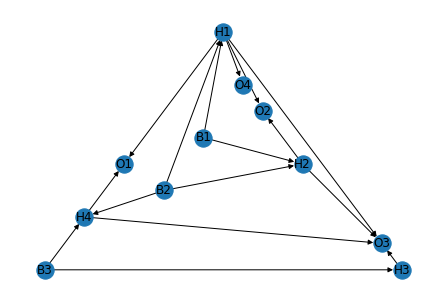

In [38]:
# draw edge from best hyp to missing observation
dg.add_weighted_edges_from([('H1', 'O2', .058404)])
nx.draw_planar(dg, with_labels=True)

In [41]:
# learn CPT for new graph
cpt_O2 = CPT(2)
cpt_O2.add_entry([1, 1], (1-.675521, .675521))
cpt_O2.add_entry([1, 0], (1-.584295, .584295))
cpt_O2.add_entry([0, 1], (1-.027656, .027656))
cpt_O2.add_entry([0, 0], (1-.346372, .346372))
dg.nodes['O2']['CPT'] = cpt_O2

### Gather new data

In [45]:
bnodes = [node for node in list(dg.nodes()) if not list(dg.predecessors(node)) and list(dg.successors(node))] #root nodes
observations = [node for node in list(dg.nodes()) if not list(dg.successors(node)) and list(dg.predecessors(node))] #terminal nodes
hypotheses = findHypotheses(dg, observations, bnodes)

In [46]:
fbe1_new = get_all_FBE(dg, observations, bnodes)
fbe2_new = get_all_FBE(dg, observations, bnodes, flipped=True)

(['H1'], 0.16089331110704436)
(['H1', 'H2'], 0.10625494400255689)
(['H1', 'H3'], 0.06580704137366333)
(['H1', 'H4'], 0.12645189578565066)
(['H1', 'H2', 'H3'], 0.0404148322384548)
(['H1', 'H2', 'H4'], 0.09241946044833205)
(['H1', 'H3', 'H4'], 0.04915771817433541)
(['H1', 'H2', 'H3', 'H4'], 0.032023960822195004)
(['H1'], 0.3709326038049026)
(['H1', 'H2'], 0.2765663390037915)
(['H1', 'H3'], 0.16503715024799714)
(['H1', 'H4'], 0.19144524644305808)
(['H1', 'H2', 'H3'], 0.12459634487284871)
(['H1', 'H2', 'H4'], 0.16592098048953183)
(['H1', 'H3', 'H4'], 0.07034301636680891)
(['H1', 'H2', 'H3', 'H4'], 0.057492728836557955)
(['H1'], 0.1556403539600509)
(['H1', 'H2'], 0.006897490865247754)
(['H1', 'H3'], 0.07147188036258997)
(['H1', 'H4'], 0.04879611117316277)
(['H1', 'H2', 'H3'], 0.003242796709115292)
(['H1', 'H2', 'H4'], 0.004302327244853034)
(['H1', 'H3', 'H4'], 0.02523666365262827)
(['H1', 'H2', 'H3', 'H4'], 0.0016008919570143156)
(['H1'], 0.22714594803374888)
(['H1', 'H2'], 0.01725953787974

In [47]:
scenarios2 = get_possible_truths(dg, bnodes, observations)
truths2 = [list(k) for k in list(scenarios2.keys())]
falses2 = list(scenarios2.values())

In [48]:
# for all possible truth value combinations, columns: True nodes, False nodes (or not), FBE1, probability1, FBE2, probability2
new_data = {}
new_data['True Nodes'] = truths2
new_data['False Nodes'] = truths2
new_data['Best Explanation'] = [v[0] for v in list(fbe1_new.values())]
new_data['Prob. of best expl.'] = [v[1] for v in list(fbe1_new.values())]
new_data['Best Explanation (flipped)'] = [v[0] for v in list(fbe2_new.values())]
new_data['Prob. of best expl. (flipped)'] = [v[1] for v in list(fbe2_new.values())]

df2 = pd.DataFrame(new_data, columns=list(new_data.keys()))
df2

,True Nodes,False Nodes,Best Explanation,Prob. of best expl.,Best Explanation (flipped),Prob. of best expl. (flipped)
0,[B1],[B1],[H1],0.160893,"[H1, H2, H4]",0.025296
1,[B2],[B2],[H1],0.370933,"[H1, H2, H4]",0.025296
2,[B3],[B3],[H1],0.155640,"[H1, H3]",0.025694
3,[O1],[O1],[H1],0.227146,"[H1, H2, H4]",0.059722
4,[O2],[O2],[H1],0.211747,"[H1, H2, H4]",0.052664
...,...,...,...,...,...,...
122,"[B1, B2, B3, O2, O3, O4]","[B1, B2, B3, O2, O3, O4]",[H1],0.949441,"[H1, H2]",0.080549
123,"[B1, B2, O1, O2, O3, O4]","[B1, B2, O1, O2, O3, O4]",[H1],0.939057,"[H1, H3, H4]",0.119751
124,"[B1, B3, O1, O2, O3, O4]","[B1, B3, O1, O2, O3, O4]",[H1],0.885465,"[H1, H3, H4]",0.115803
125,"[B2, B3, O1, O2, O3, O4]","[B2, B3, O1, O2, O3, O4]",[H1],0.951336,[H1],0.108732


In [51]:
# data to Excel
with pd.ExcelWriter(r'C:\Users\hanaa\OneDrive\amistad 2020\figures\hyp-gen-1.xlsx') as writer:  
    df1.to_excel(writer, sheet_name='Before Edge Generation')
    df2.to_excel(writer, sheet_name='After Edge Generation')

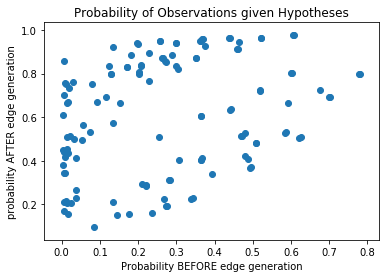

In [49]:
# bar chart to probabilities of best explanations before and after generating edges
plt.scatter([v[1] for v in list(fbe1.values())], [v[1] for v in list(fbe1_new.values())])
plt.ylabel('probability AFTER edge generation')
plt.xlabel('Probability BEFORE edge generation')
plt.title('Probability of Observations given Hypotheses')
plt.show()
plt.close()

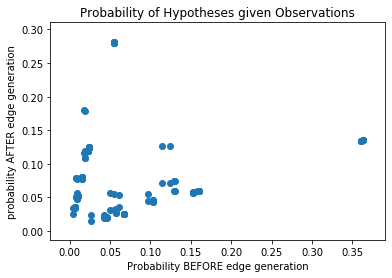

In [50]:
# bar chart to probabilities of best explanations before and after generating edges
plt.scatter([v[1] for v in list(fbe2.values())], [v[1] for v in list(fbe2_new.values())])
plt.ylabel('probability AFTER edge generation')
plt.xlabel('Probability BEFORE edge generation')
plt.title('Probability of Hypotheses given Observations')
plt.show()
plt.close()